In [4]:
import pandas as pd

file1_path = r"C:\Users\tejad\Downloads\hiring-task-data-20250204T085718Z-001\hiring-task-data\purchase_behaviour.csv"
file2_path = r"C:\Users\tejad\Downloads\hiring-task-data-20250204T085718Z-001\hiring-task-data\transaction_data.csv"


purchase_behaviour = pd.read_csv(file1_path)
transaction_data = pd.read_csv(file2_path)


purchase_behaviour.head(), transaction_data.head()


(   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
 0            1000   YOUNG SINGLES/COUPLES          Premium
 1            1002   YOUNG SINGLES/COUPLES       Mainstream
 2            1003          YOUNG FAMILIES           Budget
 3            1004   OLDER SINGLES/COUPLES       Mainstream
 4            1005  MIDAGE SINGLES/COUPLES       Mainstream,
     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0  43390          1            1000       1         5   
 1  43599          1            1307     348        66   
 2  43605          1            1343     383        61   
 3  43329          2            2373     974        69   
 4  43330          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3    Smiths Chip

In [5]:
# Merge transaction data with customer data on LYLTY_CARD_NBR
merged_df = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR")

# Identify most profitable customers (those contributing the most revenue)
customer_profit = merged_df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
top_customers = customer_profit.sort_values(by="TOT_SALES", ascending=False).head(10)

# Get their demographic details
top_customer_details = merged_df[merged_df["LYLTY_CARD_NBR"].isin(top_customers["LYLTY_CARD_NBR"])][["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]].drop_duplicates()

# Identify bestselling products
bestselling_products = merged_df.groupby("PROD_NAME")["PROD_QTY"].sum().reset_index()
bestselling_products = bestselling_products.sort_values(by="PROD_QTY", ascending=False).head(10)

# Identify top 3 most profitable products
most_profitable_products = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
most_profitable_products = most_profitable_products.sort_values(by="TOT_SALES", ascending=False).head(3)

# Identify most loyal customers (highest number of transactions)
loyal_customers = merged_df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
loyal_customers = loyal_customers.sort_values(by="TXN_ID", ascending=False).head(10)

# Get their demographic details
loyal_customer_details = merged_df[merged_df["LYLTY_CARD_NBR"].isin(loyal_customers["LYLTY_CARD_NBR"])][["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]].drop_duplicates()

# Display the results
top_customer_details, bestselling_products, most_profitable_products, loyal_customer_details


(        LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER
 33262            63197         OLDER FAMILIES           Budget
 36625           230078         OLDER FAMILIES           Budget
 36666           230154         OLDER FAMILIES           Budget
 65152           162039         OLDER FAMILIES       Mainstream
 71456           226000         OLDER FAMILIES          Premium
 116637          259009  OLDER SINGLES/COUPLES       Mainstream
 186843          130090         YOUNG FAMILIES           Budget
 191850           58361         YOUNG FAMILIES           Budget
 198995          179228         YOUNG FAMILIES           Budget
 217808           94185         YOUNG FAMILIES          Premium,
                                     PROD_NAME  PROD_QTY
 11           Dorito Corn Chp     Supreme 380g      6509
 33     Kettle Mozzarella   Basil & Pesto 175g      6381
 42   Kettle Tortilla ChpsHny&Jlpno Chili 150g      6309
 8              Cobs Popd Sea Salt  Chips 110g      6277
 10   Cobs

## What are the top 3 most profitable products?
The top 3 most profitable products are:

1. Dorito Corn Chips Supreme 380g (~$40,352 revenue)
2. miths Crinkle Cut Original Big Bag 380g (~$36,368 revenue)
3. Smiths Crinkle Chips Salt & Vinegar 330g (~$34,804 revenue)

## Characteristics of Our Most Loyal Customers
Loyal customers are defined by their frequent transactions. 

### The key characteristics are:

1. Life Stage: Majority belong to Older Families, Older Singles/Couples, and Young Families.
2. Buying Preference: Many are Mainstream and Budget buyers, with a few Premium customers.


## Hypothesis on Why Loyal Customers Prefer These Products

1. Older Families & Couples Prefer Bulk Purchases

These groups may buy larger packs of chips for family gatherings or social occasions.
The most profitable products (big bags of Doritos and Smiths Crinkle Chips) align with family-oriented consumption.

2. Budget & Mainstream Customers Look for Value

Loyal customers might prefer value-for-money deals over premium-priced products.
Bulk purchases help them save money while enjoying their favorite snacks.

3. Snacking Culture Among Young Families

Young families purchase chips frequently as a quick snack for children and casual get-togethers.
Popular products are likely appealing due to familiar flavors and brand trust.


<ipython-input-14-aaf9ca309572>:51: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  plt.tight_layout()
c:\Users\tejad\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


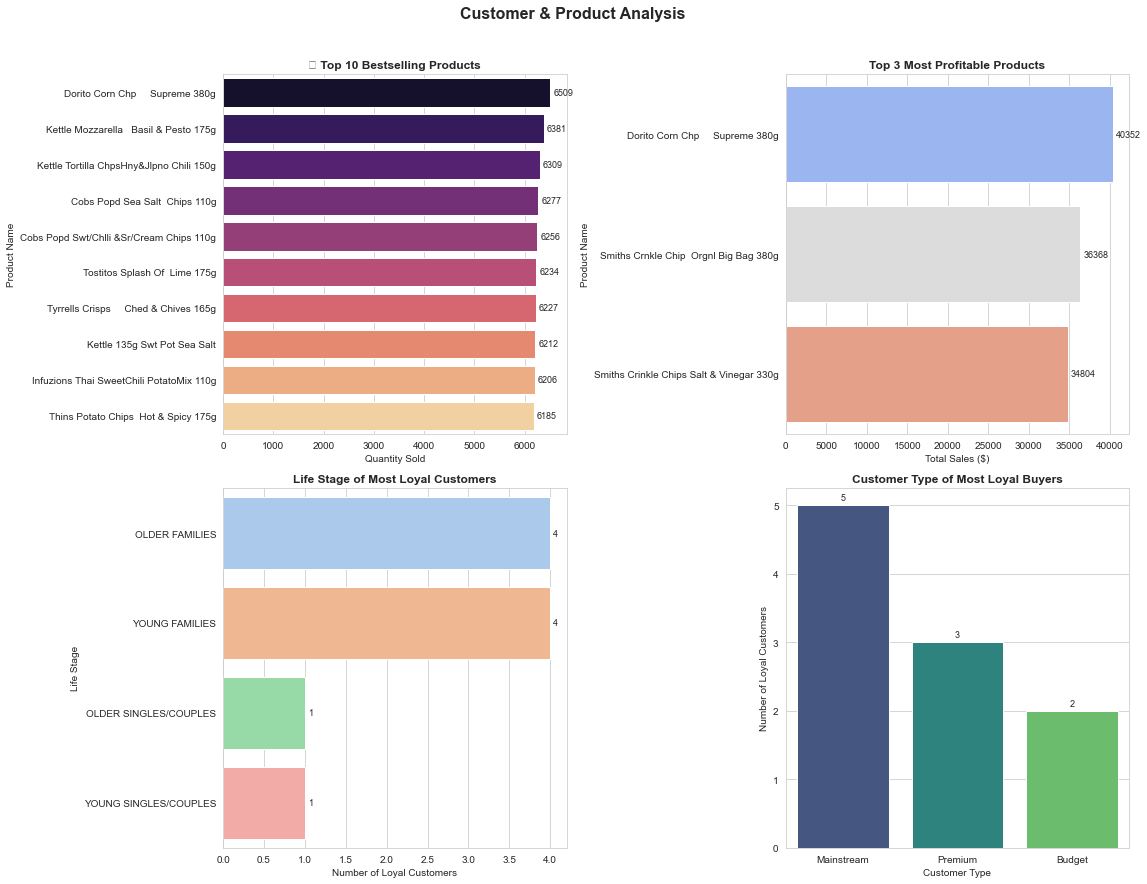

In [14]:
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

fig.suptitle("Customer & Product Analysis", fontsize=16, fontweight="bold", y=1.02)

# Subplot 1: Bestselling Products by Quantity Sold
ax0 = plt.subplot(gs[0, 0])
sns.barplot(data=bestselling_products, x="PROD_QTY", y="PROD_NAME", palette="magma", ax=ax0)
ax0.set_xlabel("Quantity Sold")
ax0.set_ylabel("Product Name")
ax0.set_title("🔝 Top 10 Bestselling Products", fontsize=12, fontweight="bold")

# Add data labels
for container in ax0.containers:
    ax0.bar_label(container, fmt="%.0f", fontsize=9, padding=3)

# Subplot 2: Most Profitable Products by Revenue
ax1 = plt.subplot(gs[0, 1])
sns.barplot(data=most_profitable_products, x="TOT_SALES", y="PROD_NAME", palette="coolwarm", ax=ax1)
ax1.set_xlabel("Total Sales ($)")
ax1.set_ylabel("Product Name")
ax1.set_title("Top 3 Most Profitable Products", fontsize=12, fontweight="bold")

# Add data labels
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=9, padding=3)

# Subplot 3: Life Stage Distribution of Most Loyal Customers
ax2 = plt.subplot(gs[1, 0])
sns.countplot(data=loyal_customer_details, y="LIFESTAGE", palette="pastel", order=loyal_customer_details["LIFESTAGE"].value_counts().index, ax=ax2)
ax2.set_xlabel("Number of Loyal Customers")
ax2.set_ylabel("Life Stage")
ax2.set_title("Life Stage of Most Loyal Customers", fontsize=12, fontweight="bold")

# Add data labels
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.0f", fontsize=9, padding=3)

# Subplot 4: Customer Type Distribution of Most Loyal Customers
ax3 = plt.subplot(gs[1, 1])
sns.countplot(data=loyal_customer_details, x="PREMIUM_CUSTOMER", palette="viridis", order=loyal_customer_details["PREMIUM_CUSTOMER"].value_counts().index, ax=ax3)
ax3.set_xlabel("Customer Type")
ax3.set_ylabel("Number of Loyal Customers")
ax3.set_title("Customer Type of Most Loyal Buyers", fontsize=12, fontweight="bold")

# Add data labels
for container in ax3.containers:
    ax3.bar_label(container, fmt="%.0f", fontsize=9, padding=3)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
